# Import library

In [102]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Data cleaning and Data processing

In [103]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [105]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [106]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [107]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [108]:
#get overall static about the dataset
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [109]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [110]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [111]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [113]:
data = pd.get_dummies(data, drop_first=True)

In [114]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [115]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [116]:
X = data.drop('Exited' , axis=1)
Y= data['Exited']
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Spiliting data  and Feature scaling

In [117]:
#Spiliting data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [118]:
#Feature scaling
#creat object
sc = StandardScaler()

In [119]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [120]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

# Creation Model Machine Learning 

In [121]:
#Use Model Logistic Regression
#creat object 
model = LogisticRegression()

In [122]:
model.fit(X_train,Y_train)

LogisticRegression()

In [123]:
#use SVM 
#creat object 
svm_model = SVC()


In [124]:
# Train the model on your training data
svm_model.fit(X_train, Y_train)

SVC()

In [125]:
# use KNN
#creat object 
knn_classifier = KNeighborsClassifier(n_neighbors=4)

In [126]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [127]:
#use DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()

In [128]:
tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [129]:
#use GradientBoosting
gb_classifier = GradientBoostingClassifier()

In [130]:
gb_classifier.fit(X_train, Y_train)

GradientBoostingClassifier()

In [131]:
#Make predictions with the model Logistic Regression
y_pred1 = model.predict(X_test)

In [132]:
#Make predictions with the model SVM
y_pred2 = svm_model.predict(X_test)

In [133]:
#Make predictions with the model KNeighborsClassifier
y_pred3 = knn_classifier.predict(X_test)

In [134]:
#Make predictions with the model DecisionTreeClassifier
y_pred4 = tree_classifier.predict(X_test)

In [135]:
#Make predictions with the model GradientBoostingClassifier
y_pred5 = gb_classifier.predict(X_test)

# Evaluation of performance

In [136]:
#Evaluation of performance model Logistic Regression 
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(Y_test,y_pred1)

In [137]:
accuracy1

0.809

In [138]:
#precision score model Logistic Regression 
precision_score(Y_test,y_pred1)

0.5939849624060151

In [139]:
#Evaluation of performance model SVM
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(Y_test,y_pred2)

In [140]:
accuracy2

0.8625

In [141]:
#precision score model SVM
precision_score(Y_test,y_pred2)

0.8367346938775511

In [142]:
#Evaluation of performance model KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(Y_test,y_pred3)

In [143]:
accuracy3

0.8285

In [144]:
#precision score model KNeighborsClassifier
precision_score(Y_test,y_pred3)

0.7105263157894737

In [145]:
#Evaluation of performance model DecisionTreeClassifier
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(Y_test,y_pred4)

In [146]:
accuracy4 

0.7865

In [147]:
#precision score model DecisionTreeClassifier
precision_score(Y_test,y_pred4)

0.4771689497716895

In [148]:
#Evaluation of performance model GradientBoostingClassifier
from sklearn.metrics import accuracy_score
accuracy5 = accuracy_score(Y_test,y_pred5)

In [149]:
accuracy5

0.8685

In [150]:
#precision score model GradientBoostingClassifier
precision_score(Y_test,y_pred5)

0.7926829268292683

# Choose best Model

In [151]:
finall_data = pd.DataFrame({'Models':['model', 'svm_model', 'knn_classifier', 'tree_classifier', 'gb_classifier'], 
                           'ACC' : [accuracy_score(Y_test,y_pred1),
                                   accuracy_score(Y_test,y_pred2),
                                   accuracy_score(Y_test,y_pred3),
                                   accuracy_score(Y_test,y_pred4),
                                   accuracy_score(Y_test,y_pred5)]})

In [152]:
finall_data

,Models,ACC
0,model,0.8090
1,svm_model,0.8625
2,knn_classifier,0.8285
3,tree_classifier,0.7865
4,gb_classifier,0.8685


# Data visualisation 

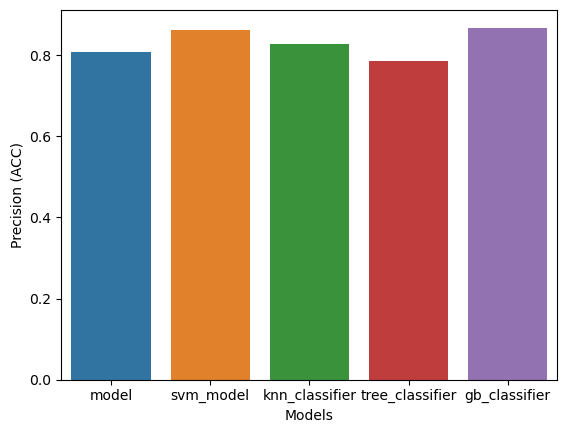

In [153]:
sns.barplot(x='Models', y='ACC', data=finall_data)
plt.xlabel('Models')
plt.ylabel('Precision (ACC)')
plt.show()

# Save best_model and best_accuracy

In [156]:
best_model = None
best_accuracy = 0.0

accuracy1 = accuracy_score(Y_test, y_pred1)
accuracy2 = accuracy_score(Y_test, y_pred2)
accuracy3 = accuracy_score(Y_test, y_pred3)
accuracy4 = accuracy_score(Y_test, y_pred4)
accuracy5 = accuracy_score(Y_test, y_pred5)

if accuracy1 > best_accuracy:
    best_model = model
    best_accuracy = accuracy1

if accuracy2 > best_accuracy:
    best_model = svm_model
    best_accuracy = accuracy2

if accuracy3 > best_accuracy:
    best_model = knn_classifier
    best_accuracy = accuracy3
    
if accuracy4 > best_accuracy:
    best_model = tree_classifier
    best_accuracy = accuracy4 
    
if accuracy5 > best_accuracy:
    best_model = gb_classifier
    best_accuracy = accuracy5

In [157]:
print("Best model :", best_model)
print("best_accuracy :", best_accuracy)

Best model : GradientBoostingClassifier()
best_accuracy : 0.8685


In [159]:
best_model_gb = GradientBoostingClassifier()
joblib.dump(best_model_gb, 'best_model_gb.pkl')

['best_model_gb.pkl']